In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import seaborn as sns

In [25]:
data_set = pd.read_csv('data_set_restaurantes_comentarios_pos_neg.csv')

In [26]:
data_set.head(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-0.295587,0.144083,0.176772,0.026896,0.078003,-0.382077,0.238828,0.614175,-0.202114,-0.237280,...,0.175144,0.042817,0.175218,0.696559,0.535637,-0.029580,-0.406479,0.307927,0.072473,1.0
1,-0.296341,0.142396,0.172736,0.028382,0.073111,-0.375925,0.240175,0.607265,-0.198618,-0.233694,...,0.171890,0.041459,0.173374,0.686505,0.526905,-0.029691,-0.402807,0.297331,0.067954,1.0
2,-0.327805,0.158564,0.191962,0.031795,0.082672,-0.420016,0.265809,0.676171,-0.220678,-0.258909,...,0.190493,0.045422,0.194045,0.766796,0.590801,-0.034510,-0.448653,0.335305,0.080624,1.0
3,-0.240621,0.112559,0.148356,0.019190,0.061529,-0.307571,0.188336,0.478218,-0.170541,-0.178176,...,0.144591,0.026286,0.138708,0.557744,0.434264,-0.019678,-0.331639,0.262708,0.051073,0.0
4,-0.217911,0.105537,0.139424,0.019284,0.061353,-0.280395,0.167077,0.439585,-0.158056,-0.158356,...,0.134627,0.016161,0.124383,0.510772,0.404357,-0.020989,-0.302405,0.246588,0.052305,0.0


In [27]:
columns = [ str(i) for i in range(100) ]
X = data_set[columns]
y = data_set['100']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Text(0.5, 1.0, 'Histograma')

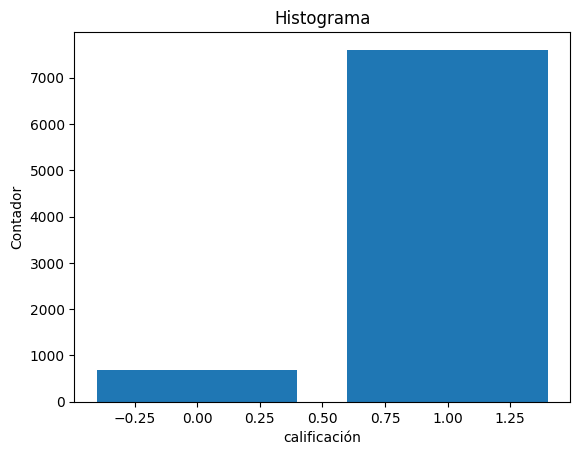

In [28]:
unique_categories_train, category_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_categories_train, category_counts)
plt.xlabel('calificación')
plt.ylabel('Contador')
plt.title('Histograma')

In [29]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Histograma')

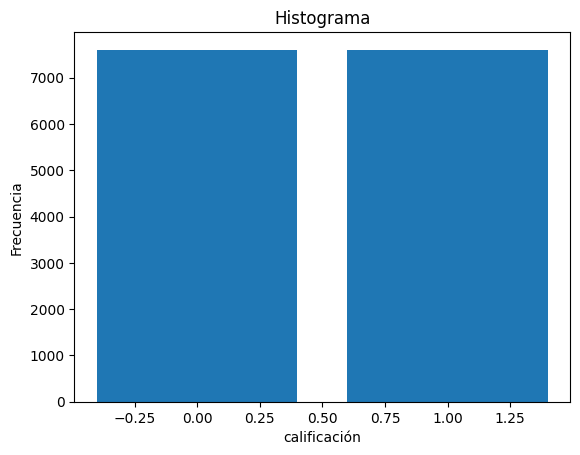

In [30]:
unique_categories_resampled, category_counts = np.unique(y_resampled, return_counts=True)
plt.bar(unique_categories_resampled, category_counts)
plt.xlabel('calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma')

Text(0.5, 1.0, 'Histograma')

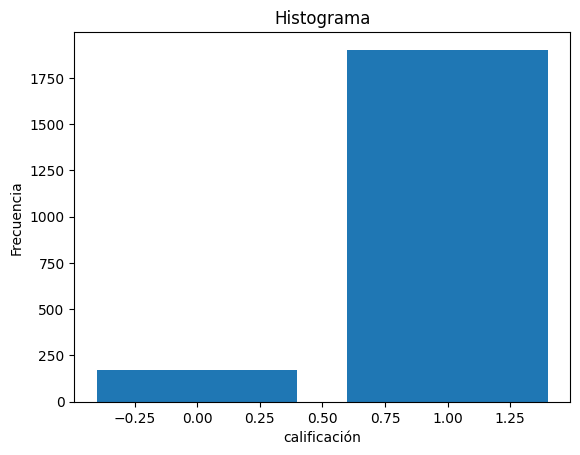

In [31]:
unique_categories_test, category_counts = np.unique(y_test, return_counts=True)
plt.bar(unique_categories_train, category_counts)
plt.xlabel('calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma')

MAQUINA DE SOPORTE VECTORIAL SVM

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [38]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Crear una instancia del clasificador SVM
svm = SVC(decision_function_shape='ovr')

# Realizar la búsqueda en cuadrícula con validación cruzada
best_model_svm = gridSearch(svm, param_grid, X_resampled, y_resampled)

Tuneando los hiper-parámetros para f1

Los mejores hiper-parámetros encontrados con validación cruzada:

{'C': 10, 'kernel': 'linear'}

Puntajes de la métrica f1 en el conjunto de validación:

0.7151 (+/-0.0173) for {'C': 0.1, 'kernel': 'linear'}
0.6946 (+/-0.0182) for {'C': 0.1, 'kernel': 'rbf'}
0.6543 (+/-0.0184) for {'C': 0.1, 'kernel': 'poly'}
0.7406 (+/-0.0090) for {'C': 1, 'kernel': 'linear'}
0.7332 (+/-0.0189) for {'C': 1, 'kernel': 'rbf'}
0.7153 (+/-0.0183) for {'C': 1, 'kernel': 'poly'}
0.7746 (+/-0.0080) for {'C': 10, 'kernel': 'linear'}
0.7601 (+/-0.0056) for {'C': 10, 'kernel': 'rbf'}
0.7460 (+/-0.0049) for {'C': 10, 'kernel': 'poly'}


In [40]:
y_pred = best_model_svm.predict(X_test)

Cuadro de Resumen de Métricas:
-----------------------------------
Exactitud (Accuracy): 0.73
Precisión (Precision): 0.98
Recall (Sensibilidad): 0.72
F1-Score: 0.83
-----------------------------------
Matriz de Confusión:
[[ 146   25]
 [ 540 1362]]


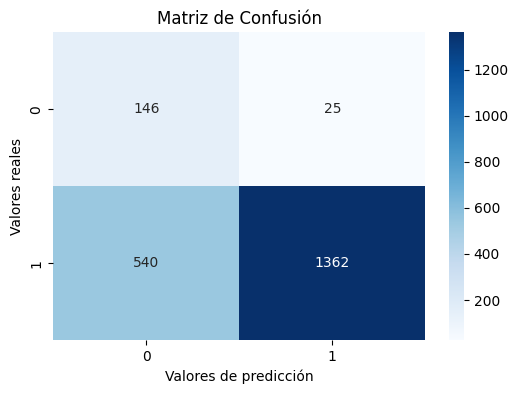

In [41]:
showMetrics(y_test, y_pred)

Arbol de decisión

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Entrenar el modelo utilizando los datos de entrenamiento
parametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creamos el clasificador del árbol de decisión
arbol_decision = DecisionTreeClassifier()

best_model_dt = gridSearch(arbol_decision, parametros, X_resampled, y_resampled)

Tuneando los hiper-parámetros para f1

Los mejores hiper-parámetros encontrados con validación cruzada:

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

Puntajes de la métrica f1 en el conjunto de validación:

0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.7293 (+/-0.0111) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split

In [45]:
y_pred_ar = best_model_dt.predict(X_test)

Cuadro de Resumen de Métricas:
-----------------------------------
Exactitud (Accuracy): 0.74
Precisión (Precision): 0.97
Recall (Sensibilidad): 0.74
F1-Score: 0.84
-----------------------------------
Matriz de Confusión:
[[ 126   45]
 [ 501 1401]]


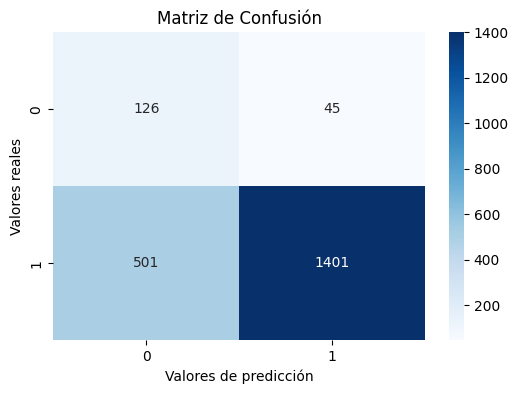

In [46]:
showMetrics(y_test, y_pred_ar)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def showMetrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Imprimiendo el cuadro de resumen
    print("Cuadro de Resumen de Métricas:")
    print("-----------------------------------")
    print(f"Exactitud (Accuracy): {accuracy:.2f}")
    print(f"Precisión (Precision): {precision:.2f}")
    print(f"Recall (Sensibilidad): {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("-----------------------------------")
    print("Matriz de Confusión:")
    print(conf_matrix)
    class_labels = [0,1]
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Valores de predicción')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()

In [34]:
def gridSearch(model, hiper, X_train, y_train):
    grid_search = GridSearchCV(estimator = model,
                           param_grid = hiper,
                           scoring = 'f1',
                           cv = 5)
    grid_search.fit(X_train, y_train)
    
    print('Tuneando los hiper-parámetros para f1')
    print()

    print('Los mejores hiper-parámetros encontrados con validación cruzada:')
    print()
    print(grid_search.best_params_)
    print()
    print('Puntajes de la métrica f1 en el conjunto de validación:')
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print('%0.4f (+/-%0.04f) for %r'% (mean, std * 2, params))
    
    return grid_search

Regresión logistica

In [47]:
from sklearn.linear_model import LogisticRegression
param_grid = {  
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 500, 1000],
    'solver': ['newton-cg', 'lbfgs'],
    'tol': [0.001, 0.0001, 0.0001]
}
model_RL = LogisticRegression()
best_model_RL = gridSearch(model_RL, param_grid, X_resampled, y_resampled)

/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/p

Tuneando los hiper-parámetros para f1

Los mejores hiper-parámetros encontrados con validación cruzada:

{'C': 10, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.001}

Puntajes de la métrica f1 en el conjunto de validación:

0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg', 'tol': 0.001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg', 'tol': 0.0001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg', 'tol': 0.0001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.0001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 0.0001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 200, 'solver': 'newton-cg', 'tol': 0.001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 200, 'solver': 'newton-cg', 'tol': 0.0001}
0.7016 (+/-0.0170) for {'C': 0.01, 'max_iter': 200, 'solver': 'newton-cg

/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
y_pred_rl = best_model_RL.predict(X_test)

Cuadro de Resumen de Métricas:
-----------------------------------
Exactitud (Accuracy): 0.72
Precisión (Precision): 0.98
Recall (Sensibilidad): 0.71
F1-Score: 0.82
-----------------------------------
Matriz de Confusión:
[[ 143   28]
 [ 549 1353]]


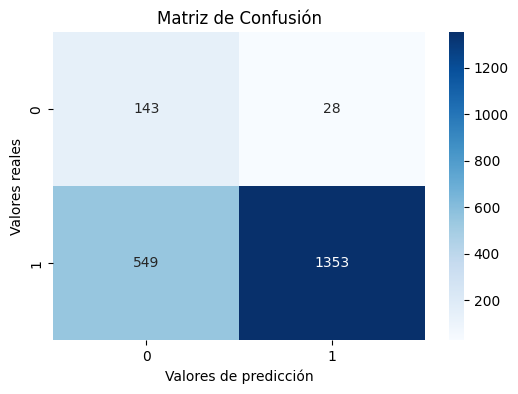

In [49]:
showMetrics(y_test, y_pred_rl)

In [51]:
from sklearn.neural_network import MLPClassifier
param_grid = {  
    'hidden_layer_sizes': [(100, ), (120, )],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'max_iter': [200, 300, 500],
    'tol': [0.001]
}
modelMLP = MLPClassifier()
best_model_MLP = gridSearch(modelMLP, param_grid, X_resampled, y_resampled)

/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_it

/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_it

Tuneando los hiper-parámetros para f1

Los mejores hiper-parámetros encontrados con validación cruzada:

{'activation': 'relu', 'hidden_layer_sizes': (120,), 'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.001}

Puntajes de la métrica f1 en el conjunto de validación:

0.7266 (+/-0.0173) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'lbfgs', 'tol': 0.001}
0.7270 (+/-0.0165) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam', 'tol': 0.001}
0.7288 (+/-0.0205) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 300, 'solver': 'lbfgs', 'tol': 0.001}
0.7359 (+/-0.0248) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 300, 'solver': 'adam', 'tol': 0.001}
0.7284 (+/-0.0163) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.001}
0.7285 (+/-0.0247) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_i

/home/florian/inteligencia-artificial/publicar-investigacion/nlp-as-comentarios-restaurantes-unmsm/envs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [52]:
y_pred_mlp = best_model_MLP.predict(X_test)

Cuadro de Resumen de Métricas:
-----------------------------------
Exactitud (Accuracy): 0.77
Precisión (Precision): 0.98
Recall (Sensibilidad): 0.77
F1-Score: 0.86
-----------------------------------
Matriz de Confusión:
[[ 136   35]
 [ 436 1466]]


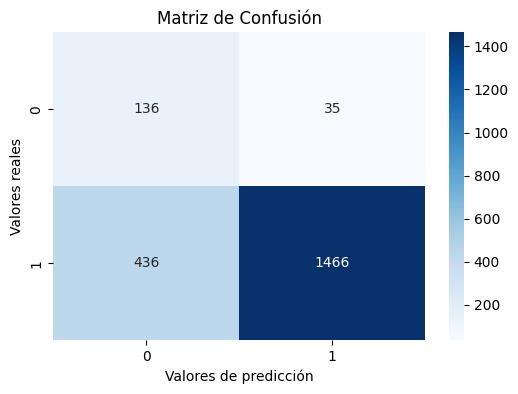

In [53]:
showMetrics(y_test, y_pred_mlp)